In [13]:
import pandas as pd
import numpy as np
import json
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [34]:
login = pd.read_json("logins.json")

In [37]:
login.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 2 columns):
index         93142 non-null int64
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 MB


In [36]:
#login.login_time_index=pd.DatetimeIndex(login.login_time)
login.reset_index(inplace=True)
login.set_index(pd.DatetimeIndex(login['login_time']), inplace=True)

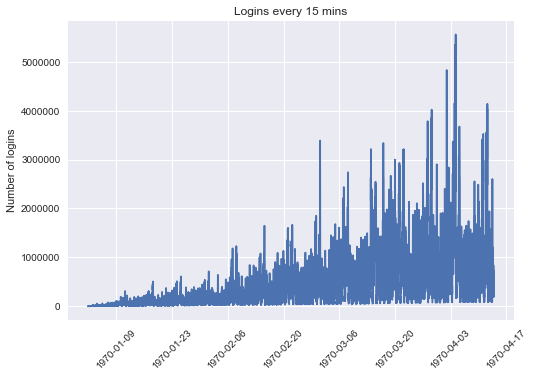

In [95]:
login_15=login.resample("15Min").sum()
login_15['Datetime'] = login_15.index
plt.plot(login_15['Datetime'],login_15['index'])
plt.title("Logins every 15 mins")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
plt.show()

#### User logins increase as the months progress but daily and weekly patterns are hard to discern from this graph

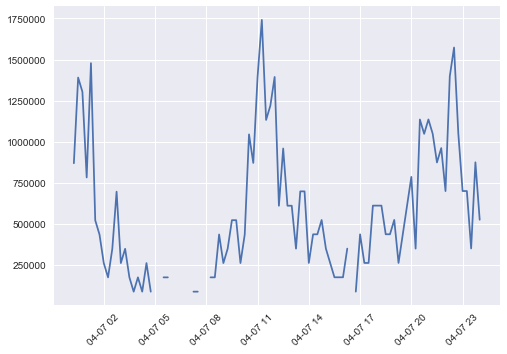

In [96]:
mask = (login_15['Datetime'] > '1970-04-07T00:00:00') & (login_15['Datetime'] <= '1970-04-08T00:00:00')
April_7=login_15.ix[mask]
plt.plot(April_7['Datetime'],April_7['index'])
plt.xticks(rotation=45)
plt.show()

#### If we look at the patterns for a single day (here April 7, 1970), we see that logins have a daily pattern. Peaking late in the night 2am, mid-morning, 11am and at night 8 pm

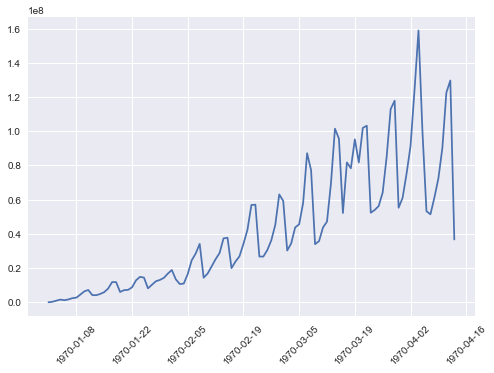

In [97]:
login_D=login.resample("D").sum()
login_D['Datetime'] = login_D.index
plt.plot(login_D['Datetime'],login_D['index'])
plt.xticks(rotation=45)
plt.show()

#### If we look at the number of logins per day, we see that there might be a weekly pattern

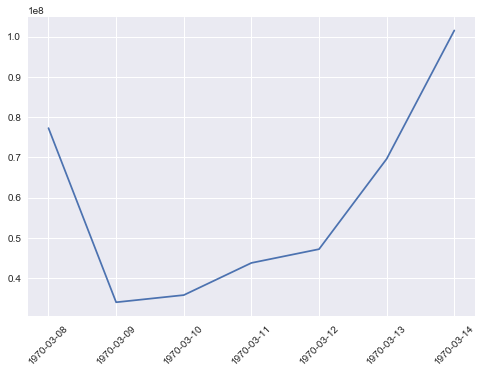

In [99]:
mask = (login_D['Datetime'] > '1970-03-07') & (login_D['Datetime'] <= '1970-03-14')
week=login_D.ix[mask]
plt.plot(week['Datetime'],week['index'])
plt.xticks(rotation=45)
plt.show()

#### Here it is interesting to note that 03-09-1970 is a Monday and logins appear to increase as the weekend approaches with slightly higher numbers on Thursday and much higher numbers on Saturday (03-14-1970)